# Sensitivity Analysis - Local SA Case Studies

This notebook is a subjective reflection Sensitivity Analysis to record my study progress.

### Table of contents

1. [Definitions](#def)
2. [Case Study 1: Local SA of A Linear Model's Inputs](#cs1)
3. [Case Study 2: Parametric SA of A Linear Model](#cs2)
4. [Reference](#ref)

---

<a id="def"></a>
## Definitions

**Sensitivity analysis (SA)** is the study of how the uncertainty in a model's inputs influences its outputs.

The most confusing concept in sensitivity analysis (SA) is probably the **input**. SA considers parameters (or coefficients of a model's equations), their boundaries, and independent variables as inputs. Generally, anything that can change the outputs is considered as an input [(Saltelli et al., 2008)](#Sal2008) or **factors** (these 2 terms can be used interchangeably). 

<a id="cs1"></a>

## Case Study 1: Local SA of A Linear Model's Inputs

A typical linear model has the following form
$$Y = \sum\limits_{i=1}^r \Omega_i Z_i, $$

whereby the input factors are $X = (\Omega_1, \Omega_2, ..., \Omega_r, Z_1, Z_2, ..., Z_r)$, and the output $Y$ is scalar.

It's intuitive to quantify the influence of any input (i.e. as defined [above](#def), i.e. $Z$ or $\Omega$, both represented by X) over the output by taking its partial derivative $\frac{\partial Y}{\partial X_j}$, j =1,2,... 2r. This method is at the core of the local SA approach, whereby only a fixed small portion of the input $X_j$ is varied while all other inputs, aka $X_{\sim j}$, are kept constant.

To show how partial derivatives may not be a good measure for the sensitivity of inputs, [Saltelli et al. (2008)](#Sal2008) proposed the following linear model:
$$Y = 2Z_1 + 2Z_2 +2Z_3 +2Z_4,$$

Only independent variables are uncertain, each of which has this normal distribution: $Z_i \sim N(0,\sigma_{Z_i}), i = 1,2,3,4$, and $\sigma = (1,2,3,4)$. Each variable $Z_i$ has some degrees of uncertainty.

Let's create a matrix that contains random combinations of $Z_i$ using Monte Carlo Simulation for 1000 samples:

In [45]:
import numpy as np
mu = 0.0
sd = (1,2,3,4)
n = 1000
M = np.zeros([n,len(sd)])
for i in range(0,len(sd)):
    M[:,i]=np.random.normal(mu,sd[i],1000)
print(M)    

[[ 1.21545114  2.47554856  1.94446834 -3.35299707]
 [-0.75209147 -1.19035108 -3.23767746 -6.29163691]
 [ 0.10305971  2.2653117   4.31238819  6.36209   ]
 ...
 [ 0.92743097  1.09038559  0.9196214  -1.86898586]
 [-1.50209446  1.63635321 -3.37250861  5.81464206]
 [-0.44082611 -0.13333457 -5.198301    0.76441493]]


Next, we'll visualize the relationships between these inputs and the output:

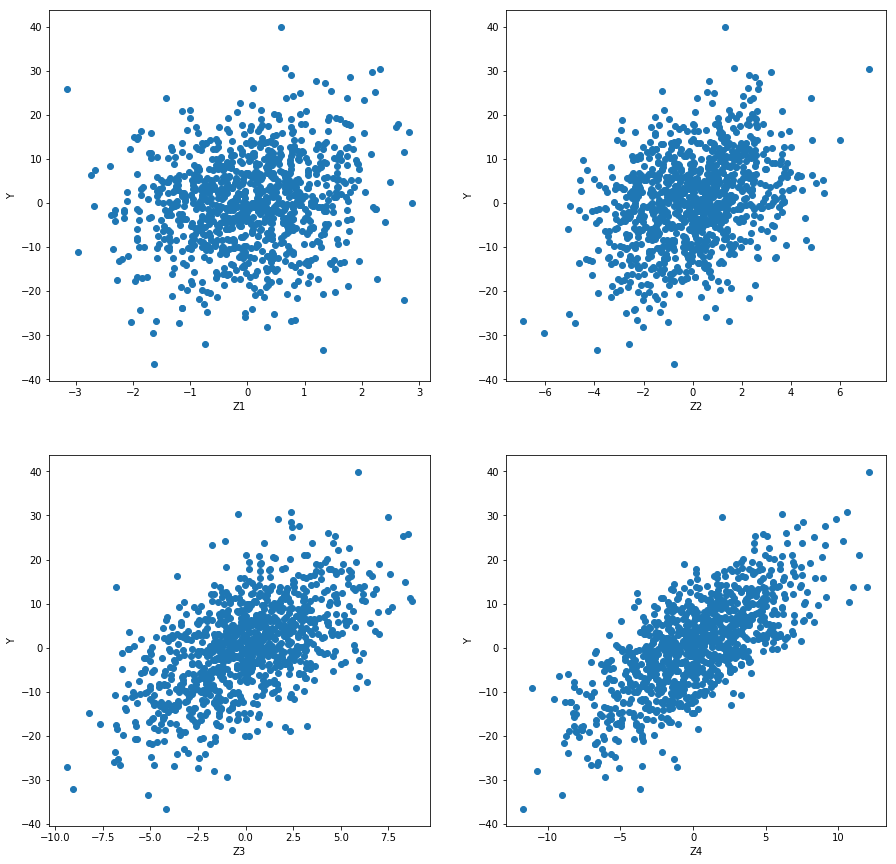

In [46]:
import matplotlib.pyplot as plt

Y = (2*M).sum(axis=1)
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(0,len(sd)):
    sp= fig.add_subplot(2,2,i+1)
    plt.scatter(M[:,i],Y)
    sp.set_ylabel("Y")
    sp.set_xlabel("Z"+str(i+1))

From the model's equation, $Y = 2Z_1 + 2Z_2 +2Z_3 +2Z_4,$ it's quite obvious to see that the partial derivatives of all inputs are 2. If we follow the local SA approach, these inputs will have equal sensitivities, i.e. same influence on the model.

However, from the scatterplots, we can see that the variation of Y caused by $Z_4$ is more than that by $Z_3$, $Z_2$, and $Z_1$. The consideration of how each input can influence the output over its full range while varying all other factors simultaneously follows the global SA approach. Thus, the above exercise is at its core a global SA method, using scatter plot and Monte Carlo simulation.

A simple modification to the partial derivatives of the inputs can allow better quantification of their sensitivities (at least for the special case discussed) by normalizing this measure with the standard deviations of the inputs and output:
 $$S_{X_j}=\frac{\sigma_{X_j}\partial Y}{\sigma_Y\partial X_j}$$

The scope of our study, however, focuses on parametric sensitivity. Thus, it's necessary to consider how partial derivatives could be useful (or otherwise) for a more generic linear model, of which parameters are not fixed but have uncertainties.

<a id="cs2"></a>
## Case Study 2: Parametric SA of A Linear Model

Let's consider a new model, adapted from [Saltelli et al., 2008](#Sal2008):
$$Y = c_1 Z_1 + c_2 Z_2 +c_3 Z_3 +c_4 Z_4,$$
assuming its inputs to have normal distributions as described below:
$$Z_i \sim N(\overline{z_i}, \sigma_{z_i})    \quad \overline{z_i}=0$$
$$c_i \sim N(\overline{c_i}, \sigma_{c_i})    \quad \overline{c_i}=i$$
whereby $i=1,2,3,4$ and $\sigma = (1,2,3,4)$ for both $c$ and $Z$

We can also try to create a Monte Carlo simulation with 1000 samples based on the distribution of these inputs, and create their scatter plots against y:

In [77]:
mu_c = (1,2,3,4)
sd = (1,2,3,4)
n = 1000
M = np.zeros([n,len(sd)*2])
for i in range(0,len(sd)):
    M[:,i]=np.random.normal(0,sd[i],1000)
    M[:,i+len(sd)]=np.random.normal(mu_c[i],sd[i],1000)
print(M)

[[ 0.36814777  0.71202626  2.13323938 ...  5.26732792  8.55735507
   5.56065699]
 [-1.45868344  4.34210514  3.83622168 ...  3.35496609  7.71525885
   8.12419292]
 [-0.76577941  2.0200201  -7.34185879 ... -2.17590498 11.22423626
   6.97978889]
 ...
 [-2.13265268  0.24161153 -0.83646708 ...  1.38190624  1.39942543
   7.13300832]
 [ 1.41255006 -1.49774936  0.31033149 ...  2.75366641  6.36760468
   5.88603326]
 [ 0.20878152 -3.54965645  3.08190874 ...  1.66956391  5.61764073
  -0.73304597]]


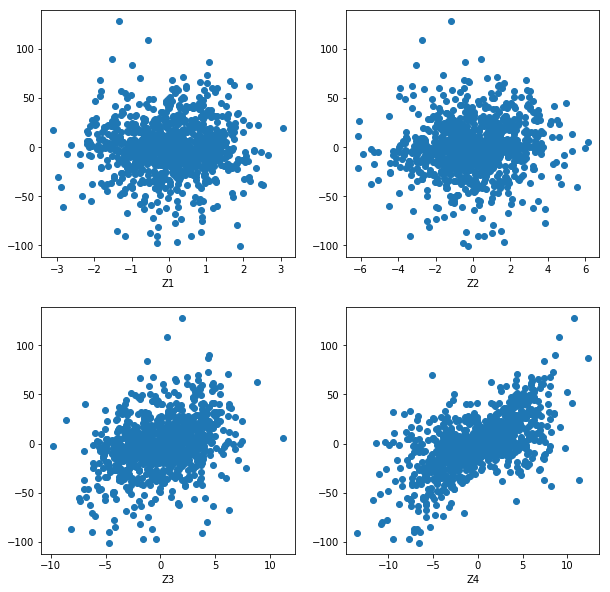

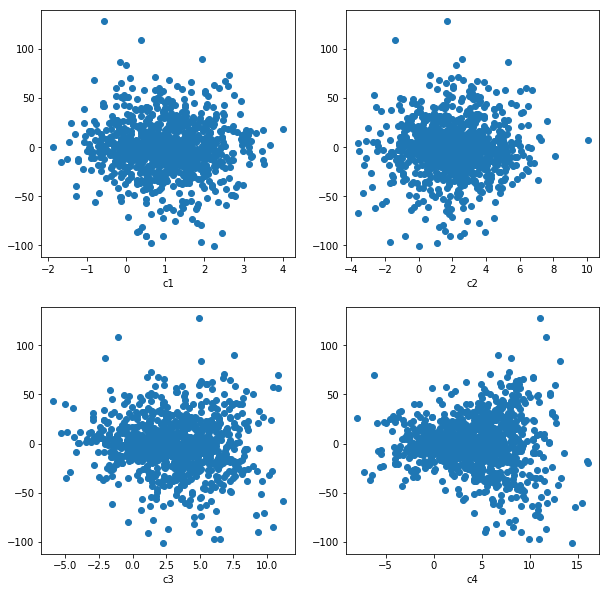

In [79]:
Y = (M[:,0:len(sd)]*M[:,len(sd):len(sd)*2]).sum(axis=1)
fig1 = plt.figure(figsize=(10,10))
fig1.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(0,len(sd)):
    sp= fig1.add_subplot(2,2,i+1)
    plt.scatter(M[:,i],Y)
    sp.set_xlabel("Z"+str(i+1))
fig2 = plt.figure(figsize=(10,10))
fig2.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(0,len(sd)):
    sp= fig2.add_subplot(2,2,i+1)    
    plt.scatter(M[:,i+len(sd)],Y)
    sp.set_xlabel("c"+str(i+1))

Consider the local SA approach, the sensitivity of $c_i$ = $\frac {\partial Y}{\partial c_i}$ = $Z_i$. This measure is no longer a scalar value but a normal distribution. Intuitively, we can try comparing the means of all the sensitivities of $c_i$ with each other to figure out about their importance. Nevertheless, the mean of $\frac {\partial Y}{\partial c_i}$ is essentially the mean of $Z_i$, which is 0 as per our model's definition. 

This conclusion based on the parametric partial derivatives obviously contradicts the trend shown in the scatter plots of $c_i$, from which we can see that $c_4$ is obviously contributing more to the variations of y than any other parameters. In this example, even $S_{c_i}=\frac{\sigma_{c_i}\partial Y}{\sigma_Y\partial c_i}$ will give us equal sensitivity measures of all parameters $c_i$ since mean($\frac {\partial Y}{\partial c_i}$) = mean($Z_i$) =0. 

However, if we use either the max or min of $Z_i$ (and thus, max or min of $\frac {\partial Y}{\partial c_i}$), we'll be able to discover some differences in parametric sensitivities.

Let's now discuss if such differences explain well the influence of $c_i$ over Y. From the scatter plots of our coefficients $c_i$, we can observe $c_4$ causes Y to change the most. To see if parametric partial derivatives can help us draw the same conclusion, let's try calculating their min and max for a comparison.

For each parameter $c_i$ of our model, its min sensitivity is $\frac {\partial Y}{\partial c_i} =Z_i$, so $min(\frac {\partial Y}{\partial c_i}) = min(Z_i) = \mu_{Z_i} -\sigma_{Z_i} = 0-\sigma_{Z_i}=-\sigma_{Z_i}$. Similarly, its max sensitivity is $max(\frac {\partial Y}{\partial c_i}) = max(Z_i) = \mu_{Z_i} +\sigma_{Z_i} = 0+\sigma_{Z_i}=\sigma_{Z_i}$. 

Considering only min sensitivities, we'll have $S_{c_1}=-1 > S_{c_2}=-2 > S_{c_3}=-3 > S_{c_4}=-4$, so $c_1$ should be the most sensitive, while $c_4$ the least. This conclusion is reversed for max sensitivities, i.e. $S_{c_1}=1 < S_{c_2}=2 < S_{c_3}=3 < S_{c_4}=4$. There exists a fatal contradiction in the 2 drawn conclusions, a major pitfall of local SA.

If we use the sigma-normalized sensitivity measure $\frac{\sigma_{c_i}\partial Y}{\sigma_Y\partial c_i}$, once again we'll get the same sensitivities for all parameters $c_i$, i.e. $\frac {-1}{\sigma_Y}$ for min $\frac {\partial Y}{\partial c_i}$; $\frac {1}{\sigma_Y}$ for max $\frac {\partial Y}{\partial c_i}$.

From this example, local SA by partial-derivatives and its sigma-normalized counterpart aren't robust methods to measure parametric sensitivities when compared against scatter plots even for linear models. It's important to explore other computational SA methods that can provide more accurate interpretations of parametric sensitivities.

<a id="ref"></a>
### Reference

<a id="Sal2008"></a>
Saltelli, A., Ratto, M., Andres, T., Campolongo, F., Cariboni, J., Gatelli, D., Saisana, M., Tarantola, S., 2008. Global sensitivity analysis: The primer. John Wiley and Sons, Ltd. West Sussex, England. 


### Technical Tutorials

1. [iPython Table of Contents](https://medium.com/@sambozek/ipython-er-jupyter-table-of-contents-69bb72cf39d3)
2. [Latex Math Symbols](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)
3. [Latex Fraction](https://www.overleaf.com/learn/latex/Fractions_and_Binomials)
4. [Numpy random normal](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html)
5. [Multiple Subplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
